In [55]:
import pandas as pd
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta 

In [271]:
resultat = pd.read_csv("/home/paul_o/dossierlinux/THP/09.08.2023/dataviz/source/resultats-par-niveau-cirlg-t1-france-entiere.csv")
positionnement = pd.read_csv("/home/paul_o/dossierlinux/THP/09.08.2023/dataviz/source/positionnement_politique_v3.csv")
numeros = pd.read_excel("/home/paul_o/dossierlinux/THP/09.08.2023/dataviz/source/n°_de_panneaux.xlsx")
display(resultat)

,Code du département,Libellé du département,Code de la circonscription,Libellé de la circonscription,Etat saisie,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,...,Voix_11,% Voix/Ins_11,% Voix/Exp_11,N°Panneau_12,Sexe_12,Nom_12,Prénom_12,Voix_12,% Voix/Ins_12,% Voix/Exp_12
0,01,Ain,1,1ère circonscription,Complet,85723,18592,21.69,67131,78.31,...,437,0.51,0.67,12,M,DUPONT-AIGNAN,Nicolas,1753,2.04,2.67
1,01,Ain,2,2ème circonscription,Complet,99383,19917,20.04,79466,79.96,...,467,0.47,0.60,12,M,DUPONT-AIGNAN,Nicolas,1883,1.89,2.42
2,01,Ain,3,3ème circonscription,Complet,81500,20440,25.08,61060,74.92,...,424,0.52,0.71,12,M,DUPONT-AIGNAN,Nicolas,1820,2.23,3.04
3,01,Ain,4,4ème circonscription,Complet,94359,19826,21.01,74533,78.99,...,445,0.47,0.61,12,M,DUPONT-AIGNAN,Nicolas,2020,2.14,2.78
4,01,Ain,5,5ème circonscription,Complet,77144,18766,24.33,58378,75.67,...,399,0.52,0.70,12,M,DUPONT-AIGNAN,Nicolas,1522,1.97,2.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,ZZ,Français établis hors de France,7,7ème circonscription,Complet,122158,69559,56.94,52599,43.06,...,349,0.29,0.67,12,M,DUPONT-AIGNAN,Nicolas,639,0.52,1.23
573,ZZ,Français établis hors de France,8,8ème circonscription,Complet,130065,106455,81.85,23610,18.15,...,133,0.10,0.57,12,M,DUPONT-AIGNAN,Nicolas,300,0.23,1.28
574,ZZ,Français établis hors de France,9,9ème circonscription,Complet,121122,81344,67.16,39778,32.84,...,135,0.11,0.34,12,M,DUPONT-AIGNAN,Nicolas,381,0.31,0.97
575,ZZ,Français établis hors de France,10,10ème circonscription,Complet,103910,63575,61.18,40335,38.82,...,163,0.16,0.41,12,M,DUPONT-AIGNAN,Nicolas,530,0.51,1.33


In [272]:
positionnement[["prenom","nom"]]=positionnement["nom_candidat"].str.split(n=1, expand=True)
positionnement = positionnement.drop(['nom_candidat'], axis=1)

In [273]:
positionnement = positionnement.reindex(columns=["nom", "prenom", "parti_politique", "sigle", "positionnement", "details_positionnement", "tete_du_parti"])
positionnement["nom"] = positionnement["nom"].str.upper()
numeros = numeros.drop(["prenom"], axis=1)

In [274]:
positionnement = pd.merge(numeros, positionnement, on="nom" )

In [275]:
positionnement = positionnement.sort_values(by=['positionnement'], ascending=False)

In [276]:
positionnement_gauche = positionnement.loc[positionnement['positionnement'] == 'gauche',"numeros"]
positionnement_gauche = positionnement_gauche.values
positionnement_gauche_2 =[]
for i in positionnement_gauche:
    positionnements = "Voix_"+str(i)
    positionnement_gauche_2.append(positionnements)

In [277]:
positionnement_candidat =positionnement['numeros'].values
positionnement_candidat_final = []
for i in positionnement_candidat:
    positionnements = "% Voix/Exp_"+str(i)
    positionnement_candidat_final.append(positionnements)

In [311]:
resultat["vote_pour_gauche"] = resultat[positionnement_gauche_2].sum(axis=1)

In [279]:
resultat["pourcentage_gauche"]=(resultat["vote_pour_gauche"]/resultat["Votants"] *100).round(2)
a_gauche = resultat.loc[resultat["pourcentage_gauche"] > 50.00]
prop_crico_gauche = (a_gauche["pourcentage_gauche"].count()/resultat["pourcentage_gauche"].count()*100).round(2)
print(prop_crico_gauche,"%")

6.24 %


In [280]:
a_gauche_small = a_gauche.iloc[:,[0,1,3,-1]]
a_gauche_small.value_counts()
#a_gauche_small["pourcentage_gauche"].plot(kind='bar',width=0.5)
#plt.show()

Code du département  Libellé du département    Libellé de la circonscription  pourcentage_gauche
13                   Bouches-du-Rhône          4ème circonscription           62.53                 1
                                               7ème circonscription           55.91                 1
94                   Val-de-Marne              11ème circonscription          53.26                 1
                                               2ème circonscription           52.50                 1
                                               9ème circonscription           50.91                 1
95                   Val-d'Oise                5ème circonscription           54.49                 1
                                               8ème circonscription           55.12                 1
ZA                   Guadeloupe                1ère circonscription           62.11                 1
                                               2ème circonscription           55.12    

,Code du département,Libellé du département,Libellé de la circonscription,% Abs/Ins
573,ZZ,Français établis hors de France,8ème circonscription,81.85
567,ZZ,Français établis hors de France,2ème circonscription,75.85
561,ZP,Polynésie française,2ème circonscription,73.50
548,ZC,Guyane,2ème circonscription,71.03
562,ZP,Polynésie française,3ème circonscription,70.82
559,ZN,Nouvelle-Calédonie,2ème circonscription,68.83
566,ZZ,Français établis hors de France,1ère circonscription,67.93
570,ZZ,Français établis hors de France,5ème circonscription,67.59
574,ZZ,Français établis hors de France,9ème circonscription,67.16
568,ZZ,Français établis hors de France,3ème circonscription,65.68


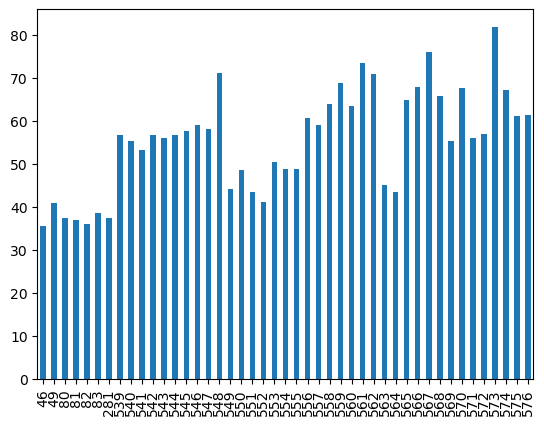

In [317]:
most_abstention = resultat.loc[resultat["% Abs/Ins"] > 35]
display(most_abstention.iloc[:,[0,1,3,7]].sort_values(by=['% Abs/Ins'], ascending=False).head(20))
most_abstention["% Abs/Ins"].plot(kind='bar',width=0.5)
plt.show()

In [296]:
display(resultat["pourcentage_gauche"].describe().round(2))

count    577.00
mean      31.98
std        9.48
min       14.87
25%       25.51
50%       29.62
75%       35.18
max       66.71
Name: pourcentage_gauche, dtype: float64

In [309]:
results_describe = resultat[positionnement_candidat_final].describe().round(2)
results_describe_mean = resultat[positionnement_candidat_final].mean().round(2)
results_describe_std = resultat[positionnement_candidat_final].std().round(2)
results_describe_cv= (results_describe_std/results_describe_mean)*100
results_describe_cv

% Voix/Exp_1     36.842105
% Voix/Exp_8     33.333333
% Voix/Exp_9     39.072848
% Voix/Exp_7     41.564685
% Voix/Exp_11    25.000000
% Voix/Exp_2     41.964286
% Voix/Exp_12    31.219512
% Voix/Exp_4     68.976898
% Voix/Exp_5     38.704028
% Voix/Exp_3     22.649728
% Voix/Exp_10    37.995825
% Voix/Exp_6     34.330484
dtype: float64